# Анализ датасета с болезнями сердечно-сосудистой системы.
<hr>

<p style="margin-left: 4px; font-family: Arial;">Содержит данные о разных пациентах и наличии у них сердечно-сосудистых заболеваний.
</p>
<br>

<h3 style="font-family: Arial;">Этапы анализа:</h3>

<p style="margin-left: 4px; font-family: Arial;">1. Формулировка проблем и определение целей
    <br>
2. Обработка данных
    <br>
3. Исследование данных 
    <br>
4. Построение моделей
    <br>
5. Выводы</p>

<br>
<h3 style="font-family: Arial;">Формулировка проблемы и определение целей</h3>
<hr>

<p style="margin-left: 4px; font-family: Arial;">Итак, наш датасет содержит данные о пациентах и наличии у них сердечно-сосудистых заболеваний. Большая часть из них - люди в возрасте от 50 до 65 лет. Нам необходимо:</p>
<ul style="font-family: Arial;">
    <li>Понять причины возникновения у людей этих заболеваний</li>
    <li>Определить те факторы, которые вероятнее всего приведут к проблемам со здоровьем</li>
    <li>Cоздать модель, которая могла бы из данных о пациенте прогнозировать наличие у него заболевания</li>
    <li>Создать простую таблицу, по которой люди могли бы узнать быстро о наличии или возникновении в будущем у них сердечно-сосудистых заболеваний.</li>
</ul>
<br>
<h4 style="font-family: Arial;">Из вышеперечисленного мы можем вывести точные цели проекта: </h4>
<ol style="font-family: Arial;">
    <li>Узнать те факторы, которые сильнее всего влияют на возникновение сердечно-сосудистых заболеваний</li>
    <li>Определить правила профилактики сердечно-сосудистых заболеваний</li>
    <li>Определить "среднего" представителя группы болеющих, и группы здоровых</li>
    <li>Создание human-readable таблицу для определения вероятности наличия сердечно-сосудистых заболеваний</li>
    <li>Создание модели машинного обучения для предсказания вероятности наличия сердечно-сосудистых заболеваний</li>
</ol>
<br>
<h4 style="font-family: Arial;">Мы также имеем промежуточные цели, которые необходимо выполнить для качественного исследования:</h4>
<ul style="font-family: Arial;">
    <li>Очистить и обработать данные из датасета</li>
    <li>Визуализировать данные</li>
    <li>Выбрать необходиммые для обучения данные, подготовить их и обучить на них модель</li>
</ul>



# Загружаем датасет

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from os.path import isdir, join
from urllib.request import urlopen
from warnings import filterwarnings

In [2]:
sns.set()
filterwarnings("ignore")

%config InlineBackend.figure_format = "retina"

In [3]:
plt.rcParams["figure.figsize"] = (9, 9)

In [4]:
URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/mlbootcamp5_train.csv"
DATASET_PATH = "./Datasets/"

In [5]:
df = pd.read_csv(URL, sep=";")

<h4 style="font-family: Arial;">Выведем на экран первые 5 записей из датасета:</h4>

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Структура датасета
<br>

<p style="margin-left: 4px; font-family: Arial;">По умолчанию наш датасет имеет следующие фичи:</p>
<br>

| Столбец | Фича | Тип столбца, значения |
| ----- | -----|----- |
| id | id пациента | int |
| age | Возраст | int (кол-во дней) |
| gender | Пол | int (1 или 2) |
| height | Рост | int (сантиметры) |
| weight | Вес | float (кг) |
| ap_hi | Систолическое артериальное давление | int (мм. рт. ст.) |
| ap_lo | Диастолическое артериальное давление | int (мм. рт. ст.) |
| cholesterol | Уровен холестерина | int (1 - нормальный, 2 - повышенный, 3 - высокий) |
| gluc | Уровен глюкозы | int (1 - нормальный, 2 - повышенный, 3 - высокий) |
| smoke | Курение | int (0 - не курит, 1 - курит) |
| alco | Употребление алкоголя | int (0 - не употребляет, 1 - употребляет) |
| active | Физическая активность | int (0 - нет частой физ. нагрузки, 1 - есть) |
| cardio | Наличие сердечно-сосудистых заболеваний | int (0 - нет, 1 - есть) |

<br>

<p style="margin-left: 4px; font-family: Arial;">С данными не всё так хорошо, как может показаться на первый взгляд. Есть несколько проблем: </p>
<br>
<h4 style="font-family: Arial;">Проблемы датасета: </h4>
<ul style="font-family: Arial;">
    <li>Неизвестно, какой пол ознчают разные значения фичи gender, поскольку по умолчанию эта информация неизвестная. Необходимо выяснить</li>
    <li>Нет гарантий, что значения у фич ap_hi и ap_lo адекватные: может оказаться, что ap_lo равен или больше ap_hi. Необходимо проверить и удалить мусор</li>
    <li>Наличие фичи id не даёт нам никакой полезной информации, поэтому столбец id стоит удалить из датасета</li>
    <li>Возраст в фиче age не даёт наглядного представления об этом самом возрасте, поскольку обычно он измеряется в годах, а не в днях. Для большей наглядности преобразуем эту фичу, чтобы она показывала кол-во прожитых лет</li>
    <li>Нет данных о наличии выбросов у каких-либо фич. По этой причине необходимо определить столбцы, в которых выбросы могут негативно повлиять на качество анализа, и удалить их.</li>
</ul>
<br>
<p style="margin-left: 4px; font-family: Arial;">Также лучше вместо роста или веса использовать индекс массы тела (ИМТ), который рассчитывается по формуле:<br> <b>ИМТ = вес / (рост^2)</b></p>

# Обработка данных
<hr>

<p style="margin-left: 4px; font-family: Arial;">1. Удалим столбец id: </p>

In [7]:
df.drop("id", axis=1, inplace=True)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<h4 style="font-family: Arial;">2. Обработаем столбец gender:  </h4>
<hr>

<ul style="font-family: Arial;">
    <li>Поскольку gender отображает лишь мужчин и женщин, то для простоты можно уменьшить все значения этой фичи на единицу, теперь в ней будут значения [0, 1]</li>
    <li>Необходимо понять, какое значение из [0, 1] отвечает за мужчин, а какое за женщин. Можно сделать это, посмотрев на значение среднего рост у каждой из групп: мужчины в среднем выше, поэтому группа с большим ростом - мужчины, а с меньшим - женщины</li>
</ul>

In [9]:
df["gender"] -= 1
df.groupby("gender")["height"].mean()

gender
0    161.355612
1    169.947895
Name: height, dtype: float64

<p style="margin-left: 4px; font-family: Arial;">Итак, средний рост у группы 1 больше, чем у группы 0 => группа 1 - мужчины, группа 0 - женщины</p>

<h4 style="font-family: Arial;">3. Обработаем ap_hi и ap_lo: </h4>
<hr>
<ul style="font-family: Arial;">
    <li>Сначала проверим, есть ли в датасете ячейки с неправильными значениями ap_hi и ap_lo</li>
    <li>Если есть, то удалим их из датасета</li>
</ul>

In [10]:
df[df["ap_hi"] <= df["ap_lo"]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,17489,1,183,98.0,160,1100,1,2,1,0,1,1
241,21932,1,157,60.0,160,1000,2,1,0,0,0,1
260,18217,0,150,83.0,140,800,1,1,0,0,1,1
329,23407,0,176,63.0,160,1000,2,2,0,0,0,1
345,18704,0,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69771,23330,0,167,81.0,160,1000,1,1,0,0,1,1
69872,21808,0,152,56.0,160,1000,1,1,0,0,1,1
69878,21239,1,168,95.0,160,1000,1,1,0,0,1,1
69885,22417,1,166,78.0,170,1000,1,1,0,0,0,0


<p style="margin-left: 4px; font-family: Arial;">Такие ячейки есть, следовательно, удаляем их: </p>

In [11]:
df = df.loc[df["ap_hi"] > df["ap_lo"]]

In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,17474,0,156,56.0,100,60,1,1,0,0,0,0


<h4 style="font-family: Arial;">4. Обработаем фичу age: </h4>
<hr>
<ul style="font-family: Arial;">
    <li>Переведём значения age из дней в года</li>
    <li>Изменим тип на целочисленный для наглядного представления</li>
</ul>

In [13]:
df["age"] = (df["age"] / 365.25).astype("uint32")

In [14]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0


<h4 style="font-family: Arial;">5. Добавим фичу bmi, которая будет отражать ИМТ: </h4>
<hr>
<ul style="font-family: Arial;">
    <li>Посчитаём столбец и добавим его в датасет</li>
</ul>

In [15]:
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)

In [16]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [17]:
df.shape

(68764, 13)

<h4 style="font-family: Arial;">6. Удалим выбросы из датасета: </h4>
<hr>
<ul style="font-family: Arial;">
    <li>Поскольку не сказано, в каких столбцах могут выбросы, то необходимо определить эти самые столбцы.</li>
    <li>Выбросы могут иметь только данные с численным типом, поэтому очищать будем столбцы ap_lo, ap_hi и bmi.</li>
    <li>Очищать height и weight не будем, поскольку вместо них мы будем использовать фичу bmi </b>
</ul>
<br>
<p style="margin-left: 4px; font-family: Arial;">Нормальными будем считать те данные, которые находятся в диапазоне от 2.5  процетиля до 97.5 процентиля.</p>

In [18]:
df = df.loc[(df["ap_lo"] >= df["ap_lo"].quantile(.025)) &
       (df["ap_lo"] <= df["ap_lo"].quantile(.975)) &
       (df["ap_hi"] >= df["ap_hi"].quantile(.025)) &
       (df["ap_hi"] <= df["ap_hi"].quantile(.975)) &
       (df["BMI"] >= df["BMI"].quantile(.025)) &
       (df["BMI"] <= df["BMI"].quantile(.975))]

In [19]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [20]:
df.shape

(62498, 13)

<p style="margin-left: 4px; font-family: Arial;">Изначальное кол-во записей в датасете: 70 000, следовательно, было вырезано примерно 10.72 % мусора. Примерно, поскольку, может быть, что не всё то, что мы вырезали, являлось мусором. Однако, это незначительно и на качество анализа никак не повлияет.</p>

# Визуализация данных
<hr>

<p style="margin-left: 4px; font-family: Arial;">Лучше всего начать анализ с построения матрицы корреляции, поскольку она уже на данном этапе может многое сказать нам о данных. Благодаря ей мы можем легко узнать, какие фичи нам стоит проанализировать и взять во внимание, а о каких можно и вовсе забыть</p>
<br>
<h4 style="font-family: Arial;">1. Построим матрицу корреляции: </h4>

<AxesSubplot:>

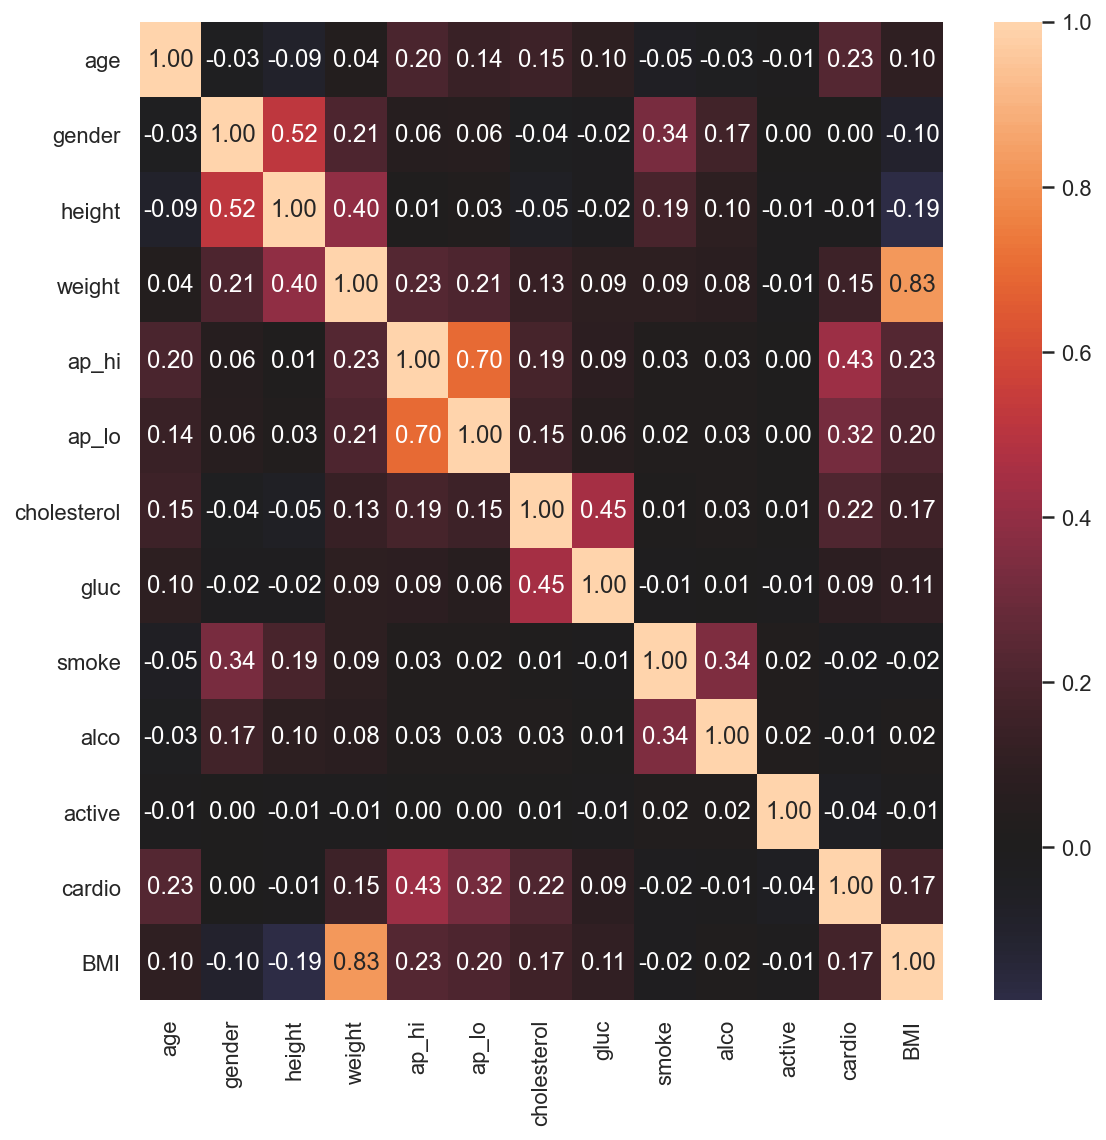

In [21]:
correlation = df.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(correlation, center=0, fmt=".2f", annot=True)

<h4 style="font-family: Arial;">2. Анализ корреляций:</h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Матрица корреляций, как следует из названия, показала нам все корреляции между всеми признаками в нашем датасете. Но нас интересует лишь cardio.</p>
<br>
<h4 style="font-family: Arial;">По корреляции с cardio все фичи можно разделить на 4 группы:</h4>

<ul style="font-family: Arial;">
    <li>Сильнокоррелируемые (от 0.4)</li>
    <li>Среднкореллируемые (0.15 - 0.4)</li>
    <li>Слабокоррелируемые (0.01 - 0.15)</li>
    <li>Некоррелируемые (0 - 0.01)</li>
</ul>

<br>
<p style="margin-left: 4px; font-family: Arial;">Разделение довольно условно, однако даёт примерное представление о полезных признаках для нашего анализа</p>
<br>
<h4 style="font-family: Arial;">Исходя из вышеописанной классификации, разделим фичи на классы:</h4>

<ul style="font-family: Arial;">
    <li>Сильнокоррелируемые (ap_hi)</li>
    <li>Среднкореллируемые (ap_lo, age, cholesterol, weight, bmi)</li>
    <li>Слабокоррелируемые (gluc, smoke, active)</li>
    <li>Некоррелируемые (gender, height, alco)</li>
</ul>
<br>
<p style="margin-left: 4px; font-family: Arial;">Для обучения модели нам нужны лишь те фичи, которые больше всего коррелируют с cardio. По этой причине мы возмём лишь <b>ap_hi</b>, <b>ap_lo</b>, <b>age</b>, <b>cholesterol</b>, <b>weight</b> и <b>bmi</b></p>
<p style="margin-left: 4px; font-family: Arial;">Однако, мы не будем использовать их всех:</p>
<ul style="font-family: Arial;">
    <li>Поскольку bmi высчитывается из weight и height, то weight мы брать не будем</li>
    <li>ap_hi - очень хороший признак, ap_lo довольно сильно зависит от ap_hi. Из этого следует, что ap_lo для нашей модели мы брать не будем</li>
    <li>bmi - самый слабокоррелируемый признак из взятых, поэтому мы оставим его на тот случай, если модель будет показывать неудолетворяющие результаты</li>
</ul>
<br>
<p style="margin-left: 4px; font-family: Arial;">В итоге для нашей модели мы будем использовать 3 признака: <b>ap_hi</b>, <b>cholesterol</b> и <b>age</b></p>

<h4 style="font-family: Arial;">3. Анализ ap_hi</h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Фича ap_hi больше всех коррелирует с cardio, для визуализации этой корреляции построим графики:</p>

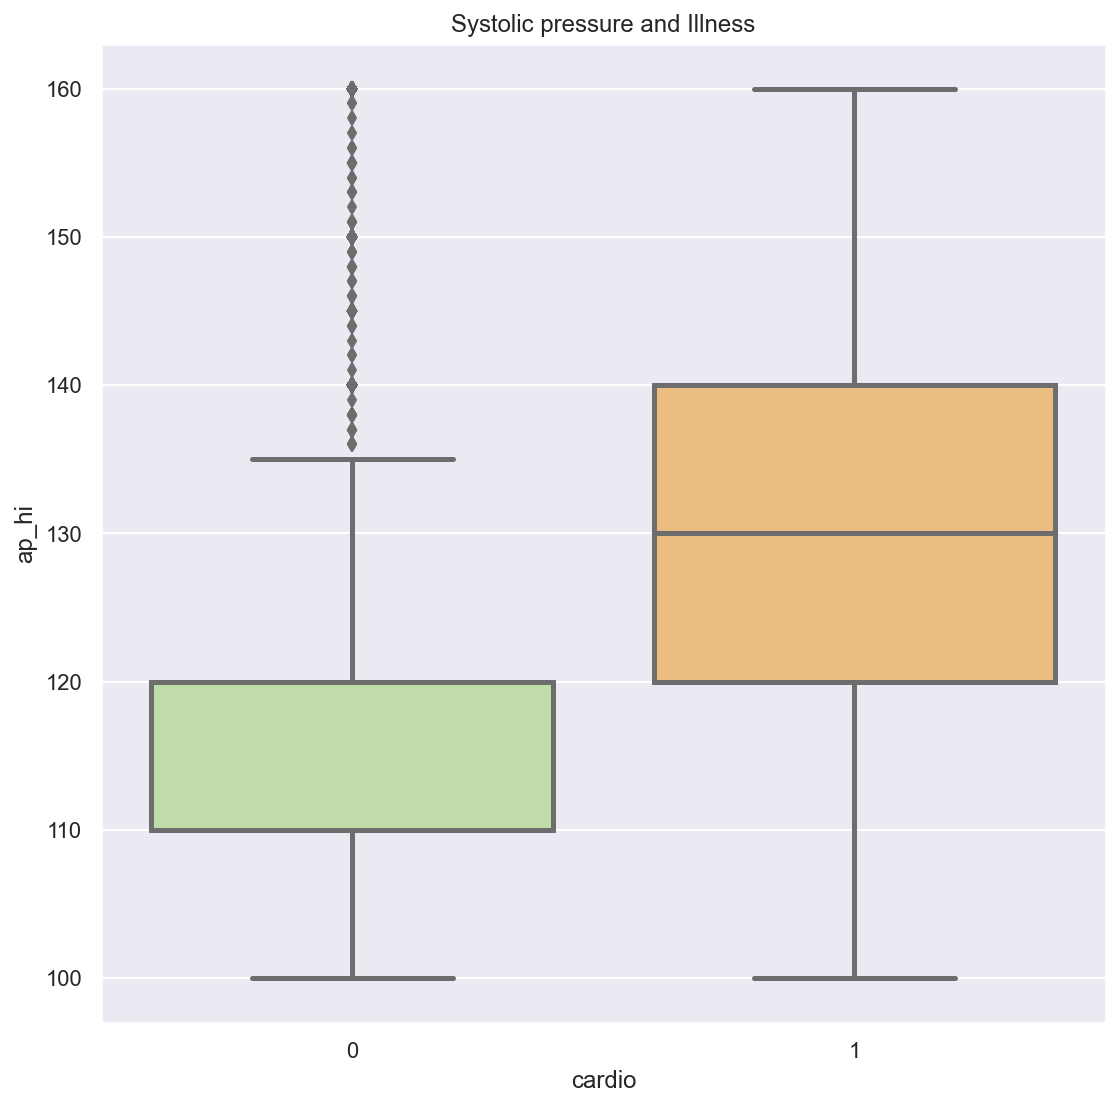

In [22]:
ax = sns.boxplot(x="cardio", y="ap_hi", data=df, palette="Spectral_r", linewidth=2.5).set_title("Systolic pressure and Illness")

<p style="margin-left: 4px; font-family: Arial;">Из диаграммы видно, как сильно отличаютс значения давления у больных и здоровых: давление у большинства здоровых находится в диапазоне от 110 до 120, тогда как у больных - в диапазоне от 120 до 140. Отличаются и средние значения: у здоровых среднее значение давления находится примерно на уровне 120, а у больных - 130. (из диаграммы)</p>
<br>
<p style="margin-left: 4px; font-family: Arial;">Найдём более точные значения:</p>

In [23]:
df.groupby("cardio")["ap_hi"].mean()

cardio
0    120.052635
1    131.865392
Name: ap_hi, dtype: float64

<p style="margin-left: 4px; font-family: Arial;">Мы также можем найти экстремум ap_hi, т.е значение, после которого большинство людей уже будут иметь заболевания:</p>

In [24]:
ap_hi_values = df.groupby("ap_hi")["cardio"].mean()
ap_hi_values[ap_hi_values > 0.5][:5]

ap_hi
104    0.833333
130    0.598769
131    0.666667
134    0.600000
135    0.688776
Name: cardio, dtype: float64

<p style="margin-left: 4px; font-family: Arial;">Значение 104 можно считать выбросом (скорее всего, у 104 просто небольшое кол-во записей), поэтому критическое значение давления - 130</p>

<h4 style="font-family: Arial;">Из вышеперечисленного можно сделать следующие выводы:</h4>
<hr>
<ul style="font-family: Arial;">
    <li>Давление сильнее всего влияет на здоровье сердечно-сосудистой системы</li>
    <li>Важным является держать значение давления до 130, поскольку люди с этим давлением и выше имеют заболевания намного чаще</li>
    <li>В профилакте заболеваний сердечно-сосудистой системы самым главным является контроль над уровнем давления в крови</li>
</ul>

<h4 style="font-family: Arial;">4. Анализ cholesterol</h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Фича cholesterol уже не так сильно коррелирует с cardio, но несмотря на это она может дать много полезной информации</p>
<p style="margin-left: 4px; font-family: Arial;">Поскольку cholesterol принимает лишь значения 1, 2 или 3, то нет смысла строить violinplot или boxplot. Вместо этого лучше всего подойдет countplot:</p>

Text(0.5, 1.0, 'Cholesterol and illness')

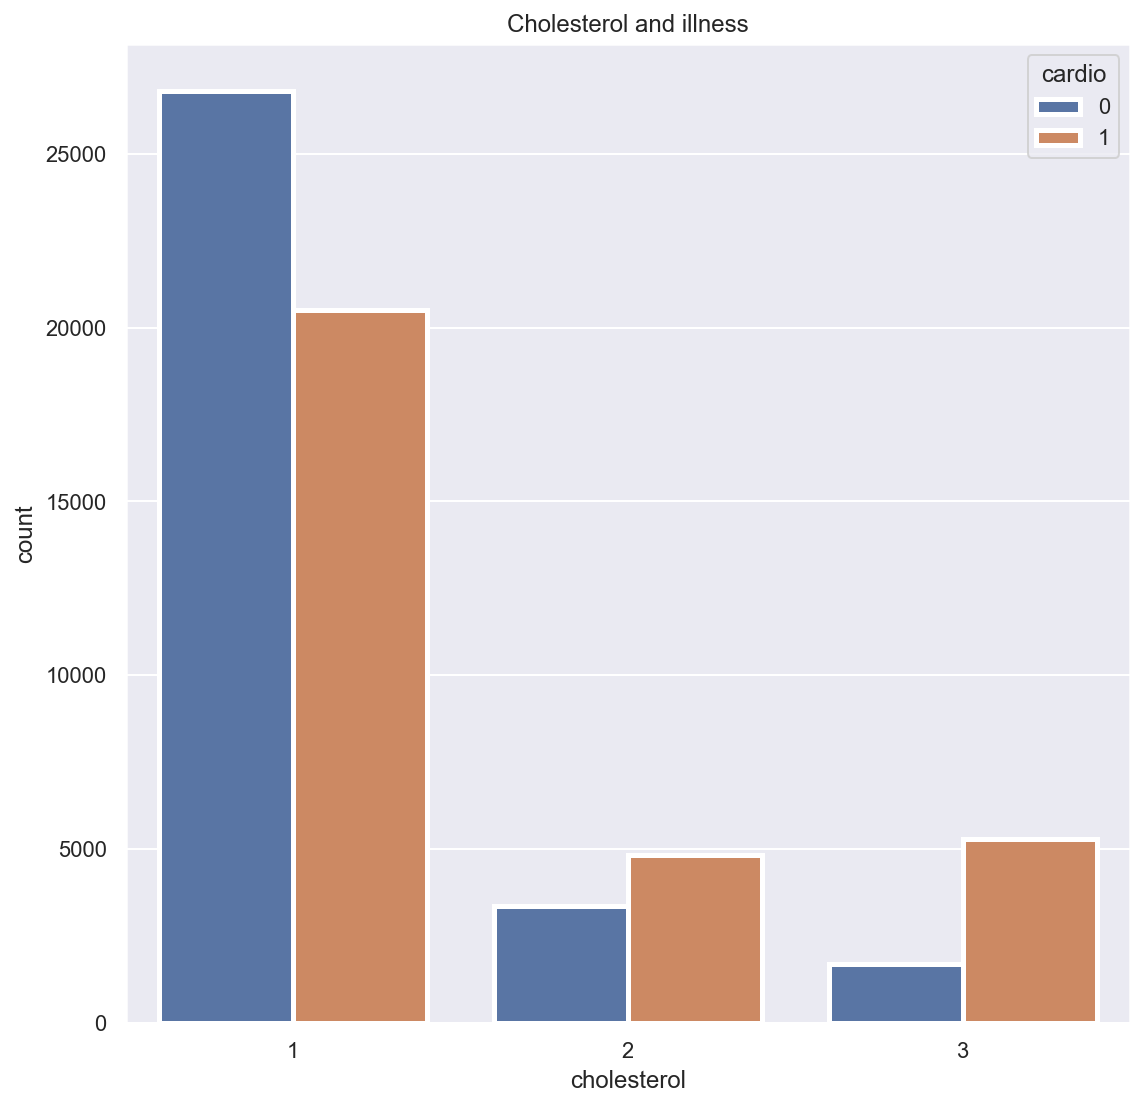

In [25]:
sns.countplot(x="cholesterol", hue="cardio", data=df, linewidth=2.5).set_title("Cholesterol and illness")

<p style="margin-left: 4px; font-family: Arial;">По диаграмме видно, что countplot уже не так сильно влияет на cardio, как ap_hi, поскольку даже при нормальном уровне холестерина число людей с середчно-сосудистыми заболеваниями лишь примерно на 25 - 30 % меньше, чем здоровых. Однако очевидна закономерность: при значений cholesterol >= 1, число болеющих уже достаточно сильно превышает здоровых, а при значений 3 они и вовсе становятся подавляющим большинством</p>
<br>
<h4 style="font-family: Arial;">Из этого можно сделать следующие выводы:</h4>
<hr>
<ul style="font-family: Arial;">
    <li>Холестерин хоть и не является главной причиной вознрикновения заболеваний, однако пагубно влияет на здоровье и даже при незначительном превышений нормы риск возникновения болезней резко повышается</li>
    <li>Холестерин не является главной причиной возникновения заболеваний</li>
    <li>Низкий холестерин не является показателем здоровья</li>
</ul>

<h4 style="font-family: Arial;">5. Анализ age</h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Возраст оказывает большое влияние на все системы организма: сердечно-сосудистая система - не исключение. Чем больше возраст, тем больше износ этой и других систем, из-за чего начинают возникать разного рода заболевания.</p>
<p style="margin-left: 4px; font-family: Arial;">Поскольку возраст - независящее от человека значение, то имеет смысл лишь понять, как с возрастом меняется шанс развития сердечно-сосудистых заболеваний:</p>

Text(0.5, 1.0, 'Age and Illness')

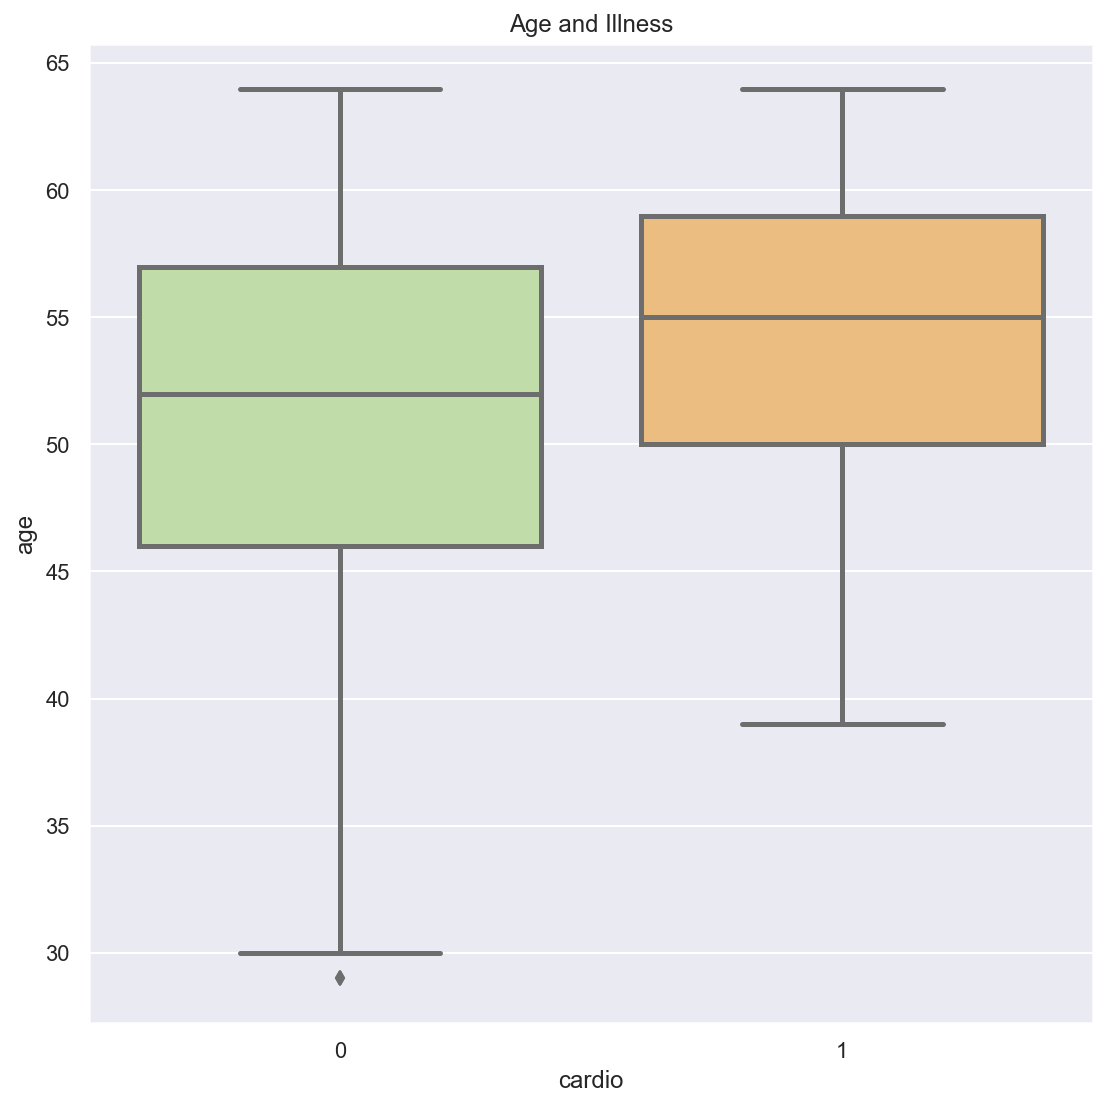

In [26]:
sns.boxplot(x="cardio", y="age", data=df, palette="Spectral_r", linewidth=2.5).set_title("Age and Illness")

<p style="margin-left: 4px; font-family: Arial;">Из диаграммы очевидно, что возраст в немалой степени влияет на возникновение заболеваний: средний возраст здоровых людей - примерно 52.5 лет, тогда как больных 55. К тому же рамки возраста большинства здоровых людей находятся в диапазоне от примерно 46 до 57, тогда как больных - от 50 до 59 лет.</p>
<p style="margin-left: 4px; font-family: Arial;">Отличаются также и общий диапазон значений возрастов: здоровые люди есть во всех возрастах, тогда как больные - лишь от примерно 39 лет</p>

<p style="margin-left: 4px; font-family: Arial;">Найдем возраст, после которого большинство людей начинают иметь сердечно-сосудистые заболевания:</p>

In [27]:
age_cardio_values = df.groupby("age")["cardio"].mean()
age_cardio_values[age_cardio_values > 0.5]

age
55    0.536929
56    0.522468
57    0.562978
58    0.535969
59    0.605379
60    0.570192
61    0.674481
62    0.661838
63    0.720509
64    0.704622
Name: cardio, dtype: float64

<p style="margin-left: 4px; font-family: Arial;">Как видно, проблемы с сердечно-сосудистой системой начинаются в среднем в 55 - 56 лет</p>

<p style="margin-left: 4px; font-family: Arial;">Для полного понимания распределения возрастов у здоровых и больных людей построим следующий график:</p>

Text(0.5, 1.0, 'Age and Illness')

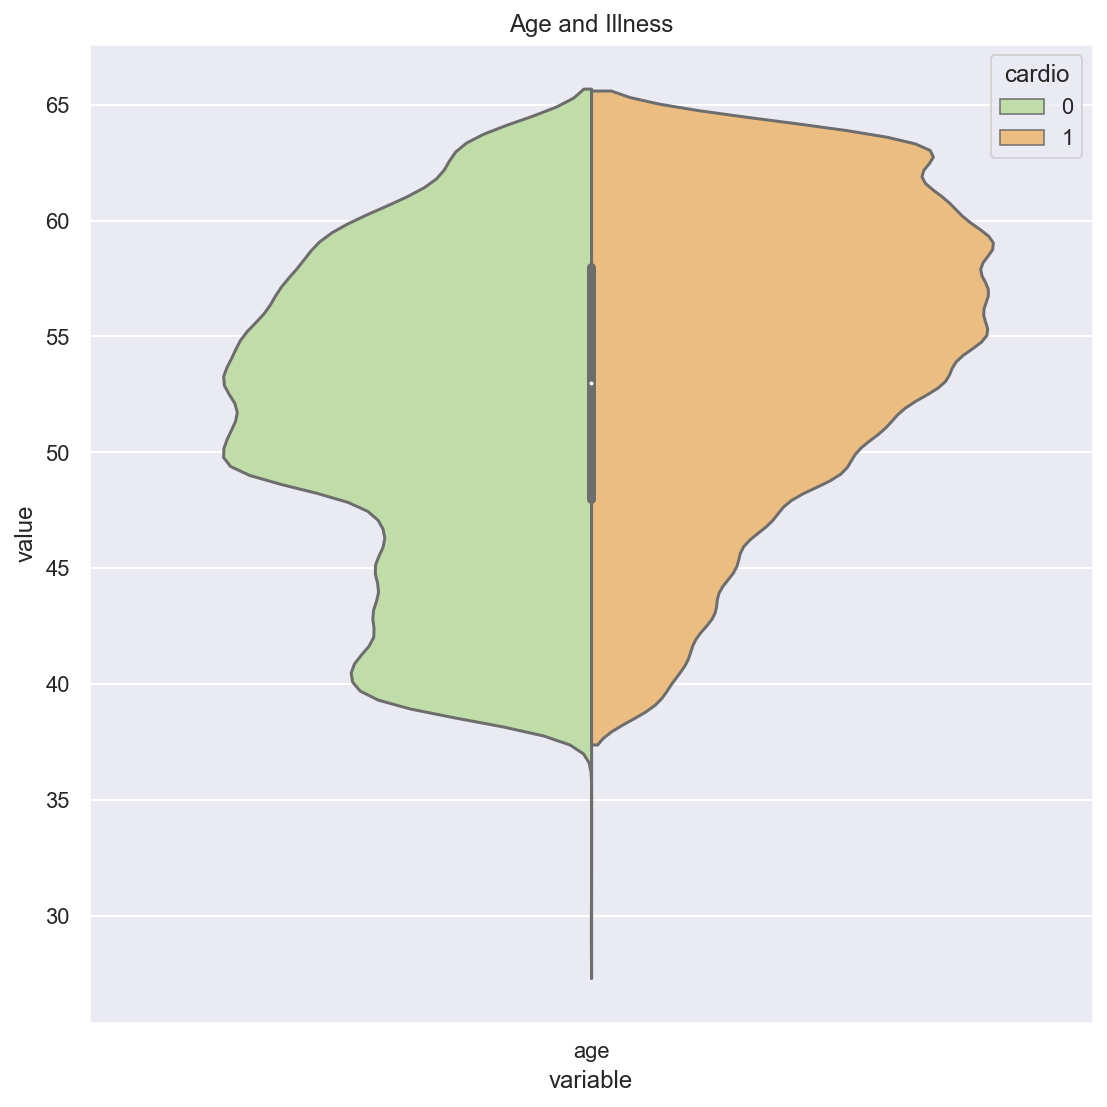

In [28]:
age_data = pd.melt(frame=df, value_vars=["age"], id_vars=["cardio"])
sns.violinplot(
    x="variable",
    y="value",
    hue="cardio",
    data=age_data,
    split=True,
    palette="Spectral_r",
    linewidth=1.5
).set_title("Age and Illness")

<p style="margin-left: 4px; font-family: Arial;">Благодаря графику можно обнаружить следующее: распределение здоровых людей имеет две вершины: 40 лет и 50-52 года. Это может иметь 2 объяснения:</p>
<ul style="font-family: Arial;">
    <li>Либо датасет располагает относительном малым кол-во данных о людях в возрасте от 40 до примерно 47 лет</li>
    <li>Либо причина в том, что люди в данном возрасте ещё относительно молоды и поэтому не ощущают действия тех заболеваний, которые уже получили, из-за чего не идут к врачу и не лечат их. К 50 годам проявления болезни становятся неприятными, из-за чего люди уже вынужденны начат лечение своих заболеваний, из-за чего в этом возрасте повышается кол-во здоровых людей.</li>
</ul>
<br>
<p style="margin-left: 4px; font-family: Arial;">Ну а вообще на этом графике видно, люди с болезнями в большинстве случаев старше здоровых</p>

<h4 style="font-family: Arial;">Из анализа age можно сделать следующие выводы:</h4>
<hr>
<ul style="font-family: Arial;">
    <li>Возраст не является главной причиной возникновения сердечно-сосудистых заболеваний</li>
    <li>Однако с возрастом вероятность заболеть становится всё выше и выше, что связанно с повышением общей изношенности организма</li>
    <li>Люди до 40 лет довольно редко имеют сердечно-сосудистые заболевания</li>
    <li>У большинства людей проблемы с сердчно-сосудистой системой начинаются примерно в 55-56 лет</li>
    <li>Людям в возрасте от 40 до 50 лет стоит игнорировать первые проявления болезней</li>
</ul>

<h4 style="font-family: Arial;">6. Анализ BMI</h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Углублённого анализа здесь не будет, построим график распределения BMI лишь для получения дополнительной информации:</p>

Text(0.5, 1.0, 'BMI and Illness')

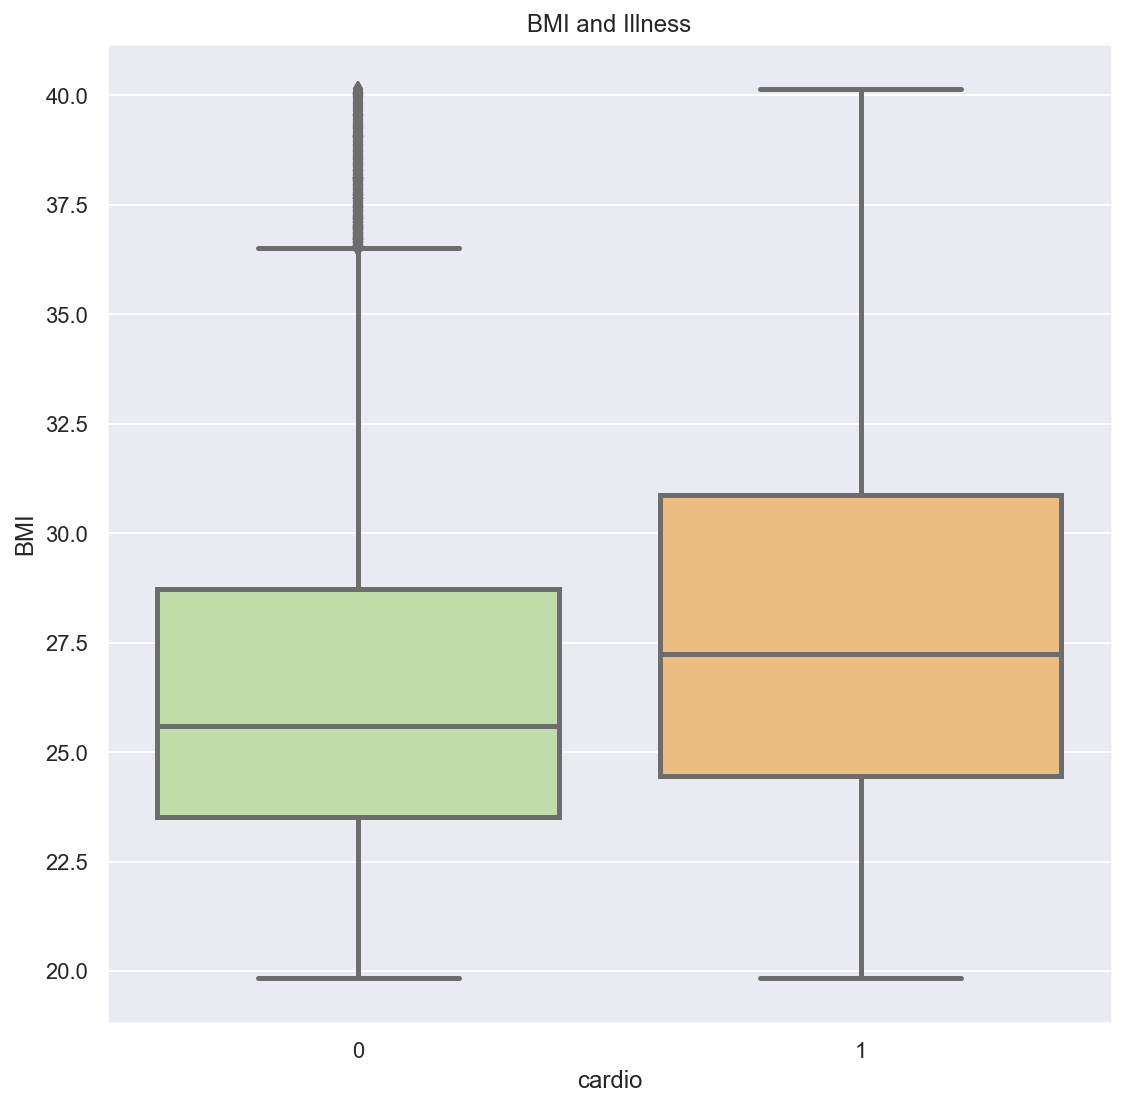

In [29]:
sns.boxplot(x="cardio", y="BMI", data=df, palette="Spectral_r", linewidth=2.5).set_title("BMI and Illness")

<p style="margin-left: 4px; font-family: Arial;">Как видно из диаграммы, больные люди в большинстве случаев обладают большим лишним весом (ИМТ), чем здоровые. Большинство здоровых имеют ИМТ в диапазоне от примерно 23.7 до 29, больные - в диапазоне от 24 до 31</p>
<p style="margin-left: 4px; font-family: Arial;">Построим countplot, чтобы определить критический уровень ИМТ, после которого большинство людей начинают иметь проблемы с сердечно-сосудистой системой:</p>

Text(0.5, 1.0, 'BMI and illness')

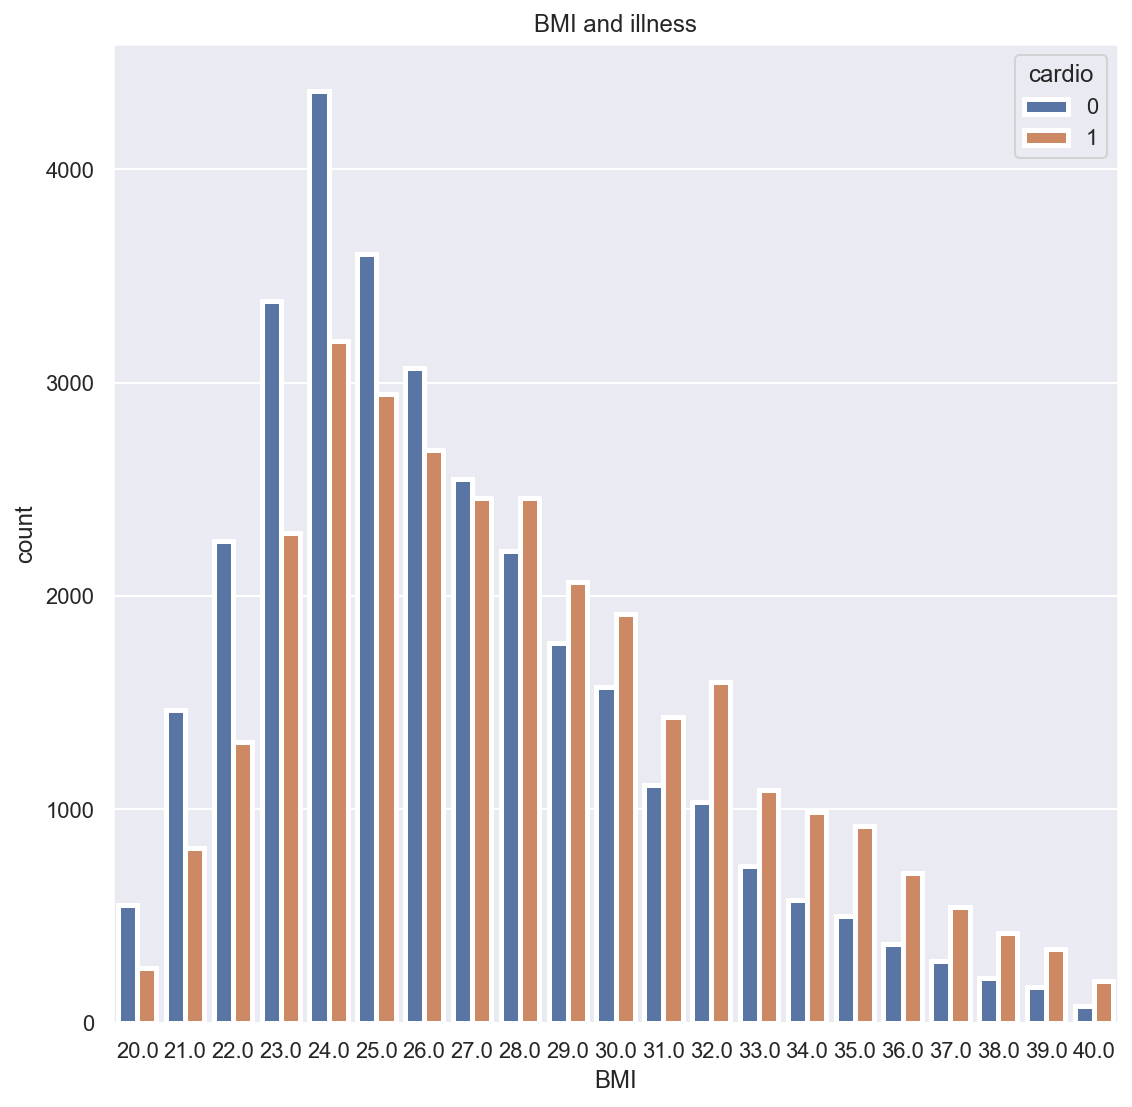

In [30]:
df_bmi = df.copy()
df_bmi["BMI"] = round(df_bmi["BMI"])
sns.countplot(x="BMI", hue="cardio", data=df_bmi, linewidth=2.5).set_title("BMI and illness")

<p style="margin-left: 4px; font-family: Arial;">По диаграмме видно, что критическим является уровень ИМТ 28-29, после данного значения кол-во больных людей начинает превышать кол-во здоровых</p>
<p style="margin-left: 4px; font-family: Arial;">Узнаем более точно: </p>

In [31]:
bmi_values = df_bmi.groupby("BMI")["cardio"].mean()
bmi_values[bmi_values > 0.5]

BMI
28.0    0.526755
29.0    0.537080
30.0    0.548924
31.0    0.562893
32.0    0.606695
33.0    0.597260
34.0    0.632118
35.0    0.649543
36.0    0.653882
37.0    0.652593
38.0    0.667195
39.0    0.675835
40.0    0.713768
Name: cardio, dtype: float64

<h4 style="font-family: Arial;">Из анализа BMI можно сделать следующие выводы:</h4>
<hr>
<ul style="font-family: Arial;">
    <li>ИМТ не является главной причиной возникновения проблем с сердечно-сосудистой системой</li>
    <li>Важно контролировать уровень ИМТ, чтобы недопустить его повышения до значения 28 и выше</li>
</ul>

# Итоги визуализации
<hr>
<p style="margin-left: 4px; font-family: Arial;">Построив различные диаграммы и проанализировав их, нам удалось выяснить те факторы, которые больше всего влияют на возниакновение сердечно-сосудистых заболеваний</p>
<br>
<h4 style="font-family: Arial;">Главыные факторы (расположены по степени влияния):</h4>

<ul style="font-family: Arial;">
    <li>Повышенное систолическое давление (более 130)</li>
    <li>Повышенный уровень холестерина в крови</li>
    <li>Возраст более 55-56 лет</li>
    <li>Лишний вес (ИМТ >= 28)</li>
</ul>
<br>

<h4 style="font-family: Arial;">В меньшей степени причинами болезней сердечно-сосудистой системы являются:</h4>
<ul style="font-family: Arial;">
    <li>Повышенный уровень глюкозы в крови</li>
    <li>Небольшое кол-во физической нагрузок</li>
</ul>

<h4 style="font-family: Arial;">Из вышеперечисленного можно составить следующие рекомендации по профилактике возникновения сердечно-сосудистых заболеваний:</h4>
<br>
<ul style="font-family: Arial;">
    <li>Поддерживайте систолическое давление на уровне от 110 до 120.</li>
    <li>Потребляйте как можно меньше продуктов, вызывающих повышение холестерина и глюкозы в крови</li>
    <li>Не набирайте лишний вес, поддерживайте ИМТ на уровне до 28</li>
    <li>Если вы находитесь в возрасте от 40 до 50 лет, то не игнорируйте первые проявления сердечно-сосудистых заболеваний</li>
    <li>После 55-56 лет тщательнее следите за своим здоровьем</li>
    <li>Регулярно проходите мед.осмотр, поскольку отдельные показатели по типу ИМТ, уровня холестерина и т.д сами по себе не являются показателем наличия заболеваний сердечно-сосудистой системы</li>
</ul>

<h4 style="font-family: Arial;">Для подтверждения советом можно взглянуть на данные среднего человека здоровой группы, и среднего человека больной группы.:</h4>
<p style="margin-left: 4px; font-family: Arial;">Для правильности разделим их на несколько групп:</p>
<ul style="font-family: Arial;">
    <li>Мужчины и женщины</li>
    <li>Возраст до 55 и после</li>
</ul>

<p style="margin-left: 4px; font-family: Arial;">Мужчины до 55 лет:</p>

In [32]:
table = pd.concat([df[(df["gender"] == 1) & (df["age"] < 55) & (df["cardio"] == 0)].mean(),
                   df[(df["gender"] == 1) & (df["age"] < 55) & (df["cardio"] == 1)].mean()], axis=1)
table.columns = ["Здоровые", "Больные"]

table

,Здоровые,Больные
age,47.000959,48.313404
gender,1.000000,1.000000
height,170.322643,170.636900
weight,74.971573,79.872487
ap_hi,120.003152,132.286748
ap_lo,78.746848,84.395659
cholesterol,1.152549,1.396611
gluc,1.140214,1.205636
smoke,0.241776,0.220487
alco,0.116365,0.102628


<p style="margin-left: 4px; font-family: Arial;">Данная таблица подтверждает выявленные нами зависимости наличия болензи от таких факторов, как давление, холестерин и т.д</p>

<p style="margin-left: 4px; font-family: Arial;">Построим подобные таблицы для каждой из групп:</p>

<p style="margin-left: 4px; font-family: Arial;">Мужчины после 55 лет:</p>

In [33]:
table = pd.concat([df[(df["gender"] == 1) & (df["age"] >= 55) & (df["cardio"] == 0)].mean(), 
                   df[(df["gender"] == 1) & (df["age"] >= 55) & (df["cardio"] == 1)].mean()], axis=1)
table.columns = ["Здоровые", "Больные"]

table

,Здоровые,Больные
age,58.766125,59.328496
gender,1.000000,1.000000
height,169.139665,169.555398
weight,75.261249,78.739717
ap_hi,123.398172,133.124071
ap_lo,80.198324,84.297876
cholesterol,1.263840,1.511327
gluc,1.220163,1.275575
smoke,0.205688,0.182478
alco,0.099035,0.090088


<p style="margin-left: 4px; font-family: Arial;">Женщины до 55 лет:</p>

In [34]:
table = pd.concat([df[(df["gender"] == 0) & (df["age"] < 55) & (df["cardio"] == 0)].mean(), 
                   df[(df["gender"] == 0) & (df["age"] < 55) & (df["cardio"] == 1)].mean()], axis=1)
table.columns = ["Здоровые", "Больные"]

table

,Здоровые,Больные
age,47.534367,48.855725
gender,0.000000,0.000000
height,162.111710,162.034280
weight,69.557188,73.586954
ap_hi,117.928497,130.978994
ap_lo,77.284292,83.633195
cholesterol,1.174978,1.449100
gluc,1.141884,1.238804
smoke,0.019093,0.018467
alco,0.026355,0.026777


<p style="margin-left: 4px; font-family: Arial;">Женщины после 55 лет:</p>

In [35]:
table = pd.concat([df[(df["gender"] == 0) & (df["age"] >= 55) & (df["cardio"] == 0)].mean(), 
                   df[(df["gender"] == 0) & (df["age"] >= 55) & (df["cardio"] == 1)].mean()], axis=1)
table.columns = ["Здоровые", "Больные"]

table

,Здоровые,Больные
age,58.376014,59.200343
gender,0.000000,0.000000
height,161.402421,160.897299
weight,70.908685,73.574272
ap_hi,122.192133,131.716828
ap_lo,79.460047,83.396531
cholesterol,1.306423,1.592087
gluc,1.234768,1.322193
smoke,0.014716,0.014272
alco,0.022830,0.021859


<p style="margin-left: 4px; font-family: Arial;">Все вышепостроенные таблицы подтверждают выведенне закономерности о возникновении у человека сердечно-сосудистых заболеваний. Кроме того, на примере среднего представителя каждой из категории видно, что созданные мной исходя из анализа советы действительно работают - люди, которые плюс-минус им следуют, имеют в среднем меньший шанс получения болезней сердечно-сосудистой системы </p>

# Построение таблицы и обучение модели
<hr>
<p style="margin-left: 4px; font-family: Arial;">Аналитический этап закончен. Теперь приступим к практике: необходимо построить таблицу, которая показывала вероятность наличия заболевания по данным пациента, а также обучить модель, которая делала бы то же самое, что и таблица, т.е предсказывала бы наличие сердечно-сосудистого заболевания по входным данным</p>
<br>
<h5 style="font-family: Arial;">1. Построим таблицу: </h5>

In [36]:
def create_table(df, gender):
    """
    df - датасет, по которому будет создана таблица
    gender - пол, для которого будет создана таблица
    
    """
    df = df[df["gender"] == gender]
    
    # делим на значения категории: 0 - мало, 1 - много, по середине будут взяты значения из таблицы
    df["age"] = df["age"].apply(lambda x: 0 if x < 50 else (x if x >= 50 and x <= 60 else 1))
    df["ap_hi"] = df["ap_hi"].apply(lambda x: 0 if x < 110 else (x if x >= 115 and x <= 135 else 1))
    
    # создаём индексы для таблицы
    age_dict, ap_dict = create_indexes_names(df, "age", ("Младше 50", "Старше 60")), create_indexes_names(df, "ap_hi", ("Менее 100", "Более 148"))
    # делим на категории, тех, кто не был классифицирован как 0 или 1 двумя строками выше
    df["age"], df["ap_hi"] = classificate(df, "age"), classificate(df, "ap_hi")
    
    # создаём сводную таблицу и даём имена её столбцам
    df_table = pd.pivot_table(index="age", columns="ap_hi", values="cardio", data=df)
    df_table.columns, df_table.index= [ap_dict[i] for i in df_table.columns.tolist()], [age_dict[i] for i in df_table.columns.tolist()]
    return df_table


def create_indexes_names(df, column, names):
    """
    Здесь каждая категория, получившаяся при разделении с помощью qcut получает своё имя.
    
    df - датасет, по которому будет создана таблица
    column - столбец, по значениям которого нужно разделить датасет
    names - уникальные индексы, которые будут добавлены для наглядности
    
    Например: если до этого класс столбца был 1, то теперь он будет, например, (10.0, 20.0]
    """
    
    a = pd.cut(df[df[column] > 2][column], bins=5).unique().tolist()
    # i+3 поскольку категории 0 и 1 уже сущевтуют
    age_dict = {i+3: (val.left, val.right) for i, val in enumerate(a)}
    # даём именные названия по типу "менее 60" или "более 60" для красоты
    age_dict[0], age_dict[1] = names
    
    return age_dict


def classificate(df, column):
    """
    Здесь классифицируются значения, которые не были классифицированы как 0 или 1, т.е находятся между
    необходимыми минимальным и максимальным значением
    
    df - датасет, по которому будет создана таблица
    column - столбец, по значениям которого нужно разделить датасет
    
    Например: если cut создал интервал (50.0, 60.0) и присвоил ему класс 2, то все значения в df[column],
    принадлежащие данному диапазону, будут заменены на 2
    """
    
    # разделяем неклассифицированные значения на 5 категории
    a = pd.DataFrame(pd.cut(df[df[column] > 2][column], bins=5, labels=range(3, 8)))
    b = pd.DataFrame(df[df[column] <= 2][column])

    return pd.concat([a, b]).sort_index()

<em style="margin-left: 4px; font-family: Arial;">Получилось немного говнокодно, но в целом более-менее нормально </em>

<p style="margin-left: 4px; font-family: Arial;">Таблица для мужчин: </p>

In [37]:
# Значения будут показываться как вероятности, поэтому для наглядности можно умножить их на 100 и представить в виде процетов
df_gov = round(create_table(df, 1) * 100, 2)
df_gov

,Менее 100,Более 148,"(127.0, 131.0)","(119.0, 123.0)","(123.0, 127.0)","(131.0, 135.0)","(114.98, 119.0)"
Младше 50,17.12,56.61,14.71,23.92,24.00,52.59,56.52
Старше 60,49.02,76.45,0.00,53.31,44.00,65.65,76.47
"(49.99, 52.0)",26.03,65.71,7.69,29.87,17.86,53.27,55.56
"(58.0, 60.0)",22.50,68.59,50.00,33.37,15.38,51.22,66.67
"(52.0, 54.0)",20.83,73.74,22.22,37.55,36.00,53.73,37.50
"(56.0, 58.0)",35.14,70.50,33.33,42.83,31.25,57.06,36.36
"(54.0, 56.0)",16.13,74.66,25.00,42.84,40.00,60.19,60.00


<p style="margin-left: 4px; font-family: Arial;">Таблица для женщин: </p>

In [38]:
df_gov = round(create_table(df, 0) * 100, 2)
df_gov

,Менее 100,Более 148,"(127.0, 131.0)","(119.0, 123.0)","(131.0, 135.0)","(123.0, 127.0)","(114.98, 119.0)"
Младше 50,12.06,46.28,24.64,23.89,34.38,57.24,70.97
Старше 60,57.27,80.07,50.00,61.26,69.77,71.55,88.46
"(54.0, 56.0)",16.30,58.44,4.35,28.78,34.69,53.24,55.56
"(49.99, 52.0)",24.69,62.19,0.00,35.26,26.32,60.00,46.67
"(58.0, 60.0)",28.66,66.13,36.84,41.60,42.86,60.39,78.95
"(52.0, 54.0)",28.81,68.06,33.33,42.85,48.48,62.77,87.50
"(56.0, 58.0)",27.20,71.38,30.00,48.01,36.00,64.71,66.67


<h4 style="font-family: Arial;">Выводы по таблицам: </h4>
<hr>

<ul style="font-family: Arial;">
    <li>Вышесозданные таблицы так же, как и другие способы визуализации данных, подтверждают замеченные закономерности: cardio зависит от возраста и давления. Конечно, на некоторых значениях age и ap_hi в таблице отчётливо заметны некоторые расхождения, однако это связано с малым кол-вом данных для определённых значений этих признаков, а не с неправильностю нашего анализа.</li>
    <li>Данную таблицу можно использовать лишь для примерного понимания величины вероятности, с которой пациент имеет сердечно-сосудистые заболевания, а не для окончательного диагноза, поскольку данных немного, из-за чего точность вероятности не так велика</li>
</ul>

<h4 style="font-family: Arial;">2. Обучение модели </h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Окончательный этап проекта - построение модели машинного обучения, которая бы по входным данным предсказывала вероятность наличия сердечно-сосудистого заболевания у пациента.</p>
<br>
<h4 style="font-family: Arial;">Этапы создания модели: </h4>
<ul style="font-family: Arial;">
    <li>Создание обучающей и тестовой выборок</li>
    <li>Создание и обучение модели</li>
    <li>Оценка точности модели</li>
    <li>Проверка модели</li>
</ul>

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [40]:
# Скопируем датасет, чтобы не бояться менять данные
df_test = df.copy()

In [41]:
df_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172,70.0,130,90,1,1,0,0,1,1,23.661439
69994,57,0,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [42]:
input_columns = ["age", "ap_hi", "cholesterol"]
output_columns = ["cardio"]

X, y = df_test[input_columns], df_test[output_columns]

<p style="margin-left: 4px; font-family: Arial;">Данные для обучения:</p>

In [43]:
X

,age,ap_hi,cholesterol
0,50,110,1
1,55,140,3
2,51,130,3
3,48,150,1
4,47,100,1
...,...,...,...
69993,53,130,1
69994,57,150,1
69995,52,120,1
69998,61,135,1


<p style="margin-left: 4px; font-family: Arial;">Разделяем данные:</p>

In [44]:
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size=0.2, random_state=42)

In [45]:
X_train

,age,ap_hi,cholesterol
67076,56,110,1
60322,41,110,1
64147,40,120,1
41425,47,120,1
38385,57,130,1
...,...,...,...
34334,58,120,2
48002,54,120,1
53087,58,130,1
56179,46,120,1


In [46]:
y_train

,cardio
67076,1
60322,0
64147,0
41425,0
38385,1
...,...
34334,0
48002,0
53087,0
56179,0


<p style="margin-left: 4px; font-family: Arial;">Создаём и обучаем модель:</p>

In [47]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

<p style="margin-left: 4px; font-family: Arial;">Точность модели:</p>

In [48]:
model.score(X_test, y_test)

0.7192575406032483

<h4 style="font-family: Arial;">Результат: </h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Конечно, точность модели составляешь лишь 72 %, что явлется довольно небольшим показателем, однако даже при такой точности наша модель уже более-менее адекватно предсказывать наличие у пациентов каких-либо сердечно-сосудистых заболеваний, что может помочь врачу поставить окончательный диагноз</p>

<h4 style="font-family: Arial;">Проверка модели: </h4>
<p style="margin-left: 4px; font-family: Arial;">Теперь проверим то, как работает обученная нами модель на случайных данных из тестовой выборки, т.е оценим её качество не на показателях, а, как говорится, на деле</p>

In [49]:
import random as rand

def get_random_predictions(X, y, n_samples=10):
    # Добавляем y в X, поскольку при train_test_split и рандомной выборке входные данные не будут соответсвовать выходным
    X[output_columns] = y
    
    samples = X.sample(n=n_samples)
    input_, output = samples[input_columns], samples[output_columns]
    
    # Создаём таблицу с предсказанной вероятностью наличия болезни и правильным ответом
    return pd.DataFrame(data={"Вероятность наличия": np.round_(model.predict_proba(input_)[:, 1] * 100, 2), 
                                          "Наличие": np.squeeze(output.values)})

In [50]:
a = get_random_predictions(X_test, y_test, 10)
# Меняем имена для наглядности
a["Наличие"] = a["Наличие"].apply(lambda x: "Есть" if x else "Нет")

a

,Вероятность наличия,Наличие
0,40.35,Нет
1,79.47,Есть
2,36.20,Нет
3,59.17,Нет
4,38.65,Нет
5,31.11,Нет
6,45.00,Есть
7,33.82,Есть
8,21.44,Нет
9,47.60,Есть


<h4 style="font-family: Arial;">Результат: </h4>
<hr>
<p style="margin-left: 4px; font-family: Arial;">Как видно таблице, обученная модель довольно неплохо работает, поскольку в большинстве случаев подсчитанная моделью вероятность совпадает с правильным ответом. Конечно, есть и направильные ответы, но, как уже описывалось ранее, модель не идеальна и можеть служить лишь дополнительным, но не основным инструментом врача.</p>

# Итоги исследования
<hr>
<p style="margin-left: 4px; font-family: Arial;">Пришло время делать выводы по проделанной работе.</p>
<br>

<h4 style="font-family: Arial;"> На данном этапе мы имеем:</h4>
    <ul style="font-family: Arial;">
    <li>Подробный анализ данных и выведенные из него правила профилактики сердечно-сосудистых заболеваний</li>
    <li>Средние представители здоровой и больной групп</li>
    <li>Human-readable таблица для понимания величины вероятности наличия сердечно-сосудистых заболеваний</li>
    <li>Модель машинного обучения, предсказывающая наличие у человека наличие болезней</li>
</ul>
<br>
<h4 style="font-family: Arial;">Из всей работы можно сделать следующие выводы:</h4>
<ul style="font-family: Arial;">
    <li>Наличие сердечно-сосудистых заболеваний - логичное следствие из образа жизни человека</li>
    <li>Причинами возникновения проблем с данной системой может быть множество факторов: от систолического давления до уровня глюкозы в крови</li>
    <li>Модели машинного обучения могут быть лишь инструментом врача, а не его заменой, поскольку не обладают достаточной точностью (по крайней мере, в данном случае)</li>
    <li>Придерживаясь простых советов, можно в несколько раз снизить вероятность возникновения сердечно-сосудистых заболеваний</li>
    <li>Для создания более точных моделей необходимо либо использовать более совершенные алгоритмы, либо бóльшую выборку.</li>
    <li>Так же бóльшую выборку стоит использовать и для создания более точных human-readable таблиц для определения вероятности наличия болезней</li>
</ul>
<br>
<p style="margin-left: 4px; font-family: Arial;">Все поставленные задачи выполнены, проект выполнен.</p>

<em style="margin-left: 4px; font-family: Arial;">Авторский комментарий: это мой первый проект в сфере Data Science, из-за чего я мог допустить большое кол-во разного рода ошибок, а также совершить множество глупостей. На момент работы над этим проектом я активно занимаюсь в этой сфере всего-лишь где-то две-три недели, из-за чего качество моей работы может быть довольно низким. Стоит имет это в виду</em>